Predicting Gas Turbine propulsion plant's decay state coefficient, two outputs:  GT Compressor decay state coefficient and GT Turbine decay state coefficient.Data Analysis, Data visualization, Feature Selection, about 10 Machine Learning models/estimators. Multilayer Perceptron(Deep Learning/Artificial Neural Network). Dataset splitted into training and testing data in order to avoid overfitting.

In [19]:
import numpy
import pandas

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor


import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [3]:
# load dataset
dataframe = pandas.read_csv("Data/navalplantmaintenance.csv", delim_whitespace=True, header=None)

dataframe = dataframe.round(3)

# Assign names to Columns
dataframe.columns = ['lever_position', 'ship_speed', 'gt_shaft', 'gt_rate', 'gg_rate', 'sp_torque', 'pp_torque', 'hpt_temp', 'gt_c_i_temp', 'gt_c_o_temp', 'hpt_pressure', 'gt_c_i_pressure', 'gt_c_o_pressure', 'gt_exhaust_pressure', 'turbine_inj_control', 'fuel_flow', 'gt_c_decay',  'gt_t_decay']

dataframe = dataframe.dropna()

dataframe = dataframe.drop('gt_c_i_temp', axis=1)

In [4]:
print("Head:", dataframe.head())


Head:    lever_position  ship_speed   gt_shaft   gt_rate   gg_rate  sp_torque  \
0           1.138         3.0    289.964  1349.489  6677.380      7.584   
1           2.088         6.0   6960.180  1376.166  6828.469     28.204   
2           3.144         9.0   8379.229  1386.757  7111.811     60.358   
3           4.161        12.0  14724.395  1547.465  7792.630    113.774   
4           5.140        15.0  21636.432  1924.313  8494.777    175.306   

   pp_torque  hpt_temp  gt_c_o_temp  hpt_pressure  gt_c_i_pressure  \
0      7.584   464.006      550.563         1.096            0.998   
1     28.204   635.401      581.658         1.331            0.998   
2     60.358   606.002      587.587         1.389            0.998   
3    113.774   661.471      613.851         1.658            0.998   
4    175.306   731.494      645.642         2.078            0.998   

   gt_c_o_pressure  gt_exhaust_pressure  turbine_inj_control  fuel_flow  \
0            5.947                1.019        

In [5]:

print("Statistical Description:", dataframe.describe())


Statistical Description:        lever_position    ship_speed      gt_shaft       gt_rate       gg_rate  \
count    11934.000000  11934.000000  11934.000000  11934.000000  11934.000000   
mean         5.166667     15.000000  27247.498685   2136.289256   8200.947312   
std          2.626388      7.746291  22148.613155    774.083881   1091.315507   
min          1.138000      3.000000    253.547000   1307.675000   6589.002000   
25%          3.144000      9.000000   8375.883750   1386.758000   7058.324000   
50%          5.140000     15.000000  21630.659000   1924.326000   8482.081500   
75%          7.148000     21.000000  39001.426750   2678.079000   9132.606000   
max          9.300000     27.000000  72784.872000   3560.741000   9797.103000   

          sp_torque     pp_torque      hpt_temp   gt_c_o_temp  hpt_pressure  \
count  11934.000000  11934.000000  11934.000000  11934.000000  11934.000000   
mean     227.335768    227.335768    735.495446    646.215331      2.352963   
std     

In [6]:

print("Shape:", dataframe.shape)


Shape: (11934, 17)


In [7]:

print("Data Types:", dataframe.dtypes)

Data Types: lever_position         float64
ship_speed             float64
gt_shaft               float64
gt_rate                float64
gg_rate                float64
sp_torque              float64
pp_torque              float64
hpt_temp               float64
gt_c_o_temp            float64
hpt_pressure           float64
gt_c_i_pressure        float64
gt_c_o_pressure        float64
gt_exhaust_pressure    float64
turbine_inj_control    float64
fuel_flow              float64
gt_c_decay             float64
gt_t_decay             float64
dtype: object


In [8]:
dataset = dataframe.values


X = dataset[:,0:15]
Y = dataset[:,15]
Y2 = dataset[:,16] 

In [9]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  3
Selected Features:  [False False False False  True False False False  True False False False
  True False False]
Feature Ranking:  [11 12  3  4  1  6  8  5  1  2 13 10  1  9  7]


'gg_rate'(Gas Generator rate of revolutions (GGn) [rpm]), 'gt_c_o_pressure'(GT Compressor outlet air pressure (P2) [bar]) and 'gt_exhaust_pressure'(Gas Turbine exhaust gas pressure (Pexh) [bar]) were top 3 selected features/feature combination for predicting 'gt_c_decay'(GT Compressor decay state coefficient)

In [10]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y2)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  3
Selected Features:  [False False False False  True False False False False False False  True
 False  True False]
Feature Ranking:  [11 12  3  4  1 10  9  5  8  6 13  1  7  1  2]


 'gg_rate', 'gt_c_o_pressure' and 'turbine_inj_control'(Turbine Injecton Control (TIC) [%]) were top 3 selected features/feature combination for predicting 'gt_t_decay'(GT Turbine decay state coefficient)

**Both ouutouts, 'gt_c_decay' and 'gt_t_decay' have the same 2 feature selections, except for their last ones.**

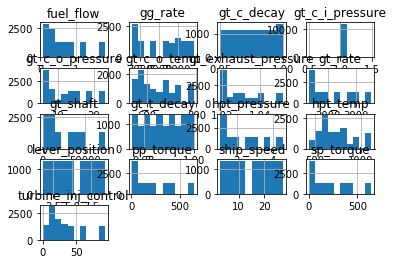

In [44]:
dataframe.hist()
plt.show()

In [12]:
# Split Data to Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)

num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X_Train, Y_Train)
    
    predictions = model.predict(X_Test)
    
    # Evaluate the model
    score = explained_variance_score(Y_Test, predictions)
    mae = mean_absolute_error(predictions, Y_Test)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

LiR: 0.849488 (0.004444)
Ridge: 0.831309 (0.004916)
Bag_Re: 0.995211 (0.000591)
RandomForest: 0.995156 (0.000577)
ExtraTreesRegressor: 0.997587 (0.000450)
KNN: 0.931132 (0.001436)
CART: 0.990549 (0.000928)


'Extra Trees Regressor' and 'Random Forest Regressor' are the best estimators/models for for predicting 'gt_c_decay'.

In [13]:
# Split Data to Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y2, test_size=0.2)

num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X_Train, Y_Train)
    
    predictions = model.predict(X_Test)
    
    # Evaluate the model
    score = explained_variance_score(Y_Test, predictions)
    mae = mean_absolute_error(predictions, Y_Test)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

LiR: 0.912420 (0.001685)
Ridge: 0.865333 (0.002093)
Bag_Re: 0.988204 (0.000430)
RandomForest: 0.988253 (0.000426)
ExtraTreesRegressor: 0.992790 (0.000305)
KNN: 0.874829 (0.001142)
CART: 0.973549 (0.000559)


And 'Extra Trees Regressor' and 'Bagging Regressor' are the best estimators/models for for predicting 'gt_t_decay'.
they can be further explored and their hyperparameters tuned

In [35]:
X = numpy.delete(X,10,1)
X.shape
X[1,:]

array([  2.08800000e+00,   6.00000000e+00,   6.96018000e+03,
         1.37616600e+03,   6.82846900e+03,   2.82040000e+01,
         2.82040000e+01,   6.35401000e+02,   5.81658000e+02,
         1.33100000e+00,   7.28200000e+00,   1.01900000e+00,
         1.06550000e+01,   2.87000000e-01])

In [38]:
# Split Data to Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)

# Normalize data
mean = X_Train.mean(axis=0)
print(mean)
X_Train -= mean
std = X_Train.std(axis=0)
print(std)
X_Train /= std
print(X_Train[0:7,:])

X_Test -= mean
X_Test /= std


# create model
model = Sequential()
model.add(Dense(6, input_dim=14, init='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, init='uniform', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(2, init='uniform', activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Fit the model
model.fit(X_Train, Y_Train, epochs=50, batch_size=10)

# Evaluate the model
scores = model.evaluate(X_Test, Y_Test)
print('/n')
print("mae = ", scores)
print("score: %.6f%%" % (100-scores))

[  5.17199246e+00   1.50161619e+01   2.72914986e+04   2.13787787e+03
   8.20376274e+03   2.27712474e+02   2.27712474e+02   7.36006944e+02
   6.46422552e+02   2.35514522e+00   1.23080770e+01   1.02949084e+00
   3.37425666e+01   6.63634742e-01]
[  2.62647758e+00   7.74569481e+00   2.21528848e+04   7.74272615e+02
   1.09072242e+03   2.00542335e+02   2.00542335e+02   1.73710858e+02
   7.27100132e+01   1.08492640e+00   5.33824227e+00   1.03900326e-02
   2.58270315e+01   5.07325353e-01]
[[ 1.15516217  1.15984923  1.0696557   1.22611999  1.00444461  1.04805065
   1.04805065  1.12131768  1.17208682  1.1464877   1.20468924  1.10771148
   1.0628567   1.07892353]
 [-1.17419333 -1.16402235 -0.95039914 -0.96560934 -1.27421029 -0.98200449
  -0.98200449 -0.90343773 -1.05858256 -0.9578025  -0.98517016 -0.91345638
  -1.29657048 -0.86066021]
 [-0.38492331 -0.38939849 -0.56730081 -0.76254004 -0.37965272 -0.56803704
  -0.56803704 -0.44764009 -0.46167716 -0.64257374 -0.62119267 -0.72096421
  -0.6108161  -0

/Users/jsiska3/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, input_dim=14, activation="relu", kernel_initializer="uniform")`
/Users/jsiska3/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_constraint=<keras.con..., kernel_initializer="uniform")`
/Users/jsiska3/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="relu", kernel_initializer="uniform")`


Epoch 1/50
8353/8353 [==============================] - 2s - loss: 0.1883     
Epoch 2/50
8353/8353 [==============================] - 1s - loss: 0.0143     
Epoch 3/50
8353/8353 [==============================] - 1s - loss: 0.0130     
Epoch 4/50
8353/8353 [==============================] - 1s - loss: 0.0130     
Epoch 5/50
8353/8353 [==============================] - 1s - loss: 0.0130     
Epoch 6/50
8353/8353 [==============================] - 1s - loss: 0.0130     
Epoch 7/50
8353/8353 [==============================] - 1s - loss: 0.0130     
Epoch 8/50
8353/8353 [==============================] - 1s - loss: 0.0130     
Epoch 9/50
8353/8353 [==============================] - 1s - loss: 0.0129     
Epoch 10/50
8353/8353 [==============================] - 1s - loss: 0.0121     
Epoch 11/50
8353/8353 [==============================] - 1s - loss: 0.0109     
Epoch 12/50
8353/8353 [==============================] - 1s - loss: 0.0103     
Epoch 13/50
8353/8353 [==========================

In [15]:
scores

0.012881989371061692

In [ ]:
# Split Data to Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y2, test_size=0.3)




# create model
model = Sequential()
model.add(Dense(6, input_dim=15, init='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, init='uniform', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(2, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='relu'))

# Compile model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Fit the model
model.fit(X_Train, Y_Train, epochs=100, batch_size=10)

# Evaluate the model
scores = model.evaluate(X_Test, Y_Test)
print("score: %.2f%%" % (100-scores))

/Users/jsiska3/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, input_dim=15, activation="relu", kernel_initializer="uniform")`
/Users/jsiska3/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_constraint=<keras.con..., kernel_initializer="uniform")`
/Users/jsiska3/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="relu", kernel_initializer="uniform")`
/Users/jsiska3/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`


Epoch 1/100
8353/8353 [==============================] - 2s - loss: 0.1661     
Epoch 2/100
8353/8353 [==============================] - 1s - loss: 0.0589     
Epoch 3/100
8353/8353 [==============================] - 1s - loss: 0.0288     
Epoch 4/100
8353/8353 [==============================] - 1s - loss: 0.0095     
Epoch 5/100
8353/8353 [==============================] - 1s - loss: 0.0074     
Epoch 6/100
8353/8353 [==============================] - 1s - loss: 0.0068     
Epoch 7/100
8353/8353 [==============================] - 1s - loss: 0.0068     
Epoch 8/100
8353/8353 [==============================] - 1s - loss: 0.0067     
Epoch 9/100
8353/8353 [==============================] - 1s - loss: 0.0067     
Epoch 10/100
8353/8353 [==============================] - 1s - loss: 0.0067     
Epoch 11/100
8353/8353 [==============================] - 1s - loss: 0.0068     
Epoch 12/100
8353/8353 [==============================] - 1s - loss: 0.0067     
Epoch 13/100
8353/8353 [=============